## ATP Data Analysis
### INSY 6500
### Author: Nick Colosi

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import time
from pathlib import Path
from sys import platform
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# Import Data and create new fields
if platform == 'win32':
    folder = "C://Users//Nick Colosi//Desktop//INSY6500_Project//INSY6500_Project//matches"
    directory = os.fsencode("C://Users//Nick Colosi//Desktop//INSY6500_Project//INSY6500_Project//matches")
    frames = []
    for file in os.listdir(directory):
        file = os.fsdecode(file)
        if file.endswith(".csv"):
            i = folder + "//" + file
            df = pd.read_csv(i)
            frames.append(df)
else:
    folder = "//Users//chochimagic//Desktop//INSY6500_Project-master//Data"
    directory = os.fsencode("//Users//chochimagic//Desktop//INSY6500_Project-master//Data")
    frames = []
    for file in os.listdir(directory):
        file = os.fsdecode(file)
        if file.endswith(".csv"):
            i = "//Users//chochimagic//Desktop//INSY6500_Project-master//Data//" + file
            df = pd.read_csv(i)
            frames.append(df)

matches_temp = pd.concat(frames)
matches_temp['ID'] = np.arange(len(matches_temp))
matches = matches_temp.set_index('ID')
matches_raw = matches_temp.set_index('ID')
matches['date'] =  pd.to_datetime(matches['tourney_date'], format='%Y%m%d')

# Year
matches['year'] = matches['date'].dt.year

# Winner seed minus loser seed
matches['seed_diff'] = matches['winner_seed'] - matches['loser_seed']

# Winner height minus loser height
matches['ht_diff'] = matches['winner_ht'] - matches['loser_ht']

# Winner age minus loser age (negative means winner is younger lol)
matches['age_diff'] = matches['winner_age'] - matches['loser_age']

# Winner rank minus loser rank
matches['rank_diff'] = matches['winner_rank'] - matches['loser_rank']

# Winner aces minus loser aces
matches['ace_diff'] = matches['w_ace'] - matches['l_ace']

# Winner double faults minus loser double faults
matches['df_diff'] = matches['w_df'] - matches['l_df']

# Winner first serves in minus loser first serves in
matches['1stIn_diff'] = matches['w_1stIn'] - matches['l_1stIn']

# Winner first serves won minus loser first serves won
matches['1stWon_diff'] = matches['w_1stWon'] - matches['l_1stWon']

# Winner second serves won minus loser second serves won
matches['2ndWon_diff'] = matches['w_2ndWon'] - matches['l_2ndWon']

# Winner service games won minus loser service games won
matches['SvGms_diff'] = matches['w_SvGms'] - matches['l_SvGms']

# Same hand if true
matches['same_hand'] = (matches['winner_hand'] == matches['loser_hand']) 

# Winner break points saved minus loser break points saved
matches['bpSaved_diff'] = matches['w_bpSaved'] - matches['l_bpSaved']

# Winner break points faced minus loser break points faced
matches['bpFaced_diff'] = matches['w_bpFaced'] - matches['l_bpFaced']

# Total aces
matches['total_aces'] = matches['w_ace'] + matches['l_ace']
matches['total_svpt'] = matches['w_svpt'] + matches['l_svpt']
# Total double faults
matches['total_df'] = matches['w_df'] + matches['l_df']

# Total first in
matches['total_1stIn'] = matches['w_1stWon'] + matches['l_1stWon']

# Percentages
matches['w_percent_1stIn'] = matches['w_1stIn'] / matches['w_svpt']
matches['l_percent_1stIn'] = matches['l_1stIn'] / matches['l_svpt']
matches['ave_1stIn'] = (matches['w_percent_1stIn'] + matches['l_percent_1stIn']) / 2
matches['total_ht'] = matches['winner_ht'] + matches['loser_ht']
matches['w_per_ace'] = matches['w_ace'] / matches['w_svpt']
matches['l_per_ace'] = matches['l_ace'] / matches['l_svpt']
matches['ave_per_ace'] = (matches['w_per_ace'] + matches['l_per_ace']) / 2
matches['w_bpsv_per'] = matches['w_bpSaved'] / matches['w_bpFaced']
matches['l_bpsv_per'] = matches['l_bpSaved'] / matches['l_bpFaced']

# Misc
matches['total_age'] = matches['winner_age'] + matches['loser_age']
matches['retired'] = matches['score'].str.contains('RET', regex=False)
matches.replace(' NaN', np.NaN)
matches = matches.replace(['Us Open'], 'US Open')
matches['w_tp'] = 0.0
matches['l_tp'] = 0.0
matches['w_prev'] = 0.0
matches['l_prev'] = 0.0
matches['yng_win'] = (matches['age_diff'] < 0)
matches['tall_win'] = (matches['ht_diff'] > 0)

# Create Grand Slam DF
gs_raw = matches[matches['tourney_level'] == 'G']
gs = gs_raw[gs_raw['retired'] == False]
gs_minutes = gs[gs['year'] != 1994]


# Ace Analysis

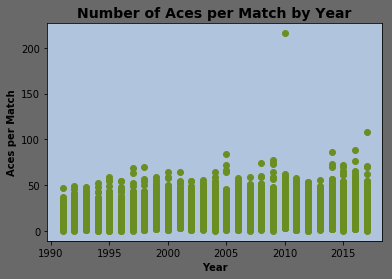

In [4]:
# Plot Total Aces/Match by the year
fig, ax = plt.subplots(1)
ax.set_title('Number of Aces per Match by Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Aces per Match', fontweight='bold')
ax.scatter(gs['year'], gs['total_aces'], color='olivedrab')
ax.set_facecolor('lightsteelblue')
fig.set_facecolor('dimgrey')

In [5]:
# Pull record
gs[['tourney_name', 'year', 'winner_name', 'loser_name', 'total_aces']][gs['total_aces'] > 200]

,tourney_name,year,winner_name,loser_name,total_aces
ID,,,,,
106857,Wimbledon,2010.0,John Isner,Nicolas Mahut,216.0


In [6]:
# Create various dataframes used to analyze different relationships
cols = ['minutes', 'ht_diff', 'age_diff', 'rank_diff', 'seed_diff', 'ace_diff', 'df_diff', 'total_aces', 'total_df', '1stIn_diff', '1stWon_diff', 'bpFaced_diff', 'total_1stIn', 'w_percent_1stIn', 'l_percent_1stIn', 'ave_1stIn', 'ave_per_ace']
gs_surface = gs.groupby(['surface'])[cols].mean()
gs_tourney = gs.groupby(['tourney_name'])[cols].mean()
gs_year = gs.groupby('year')[cols].mean()
gs_tourney_year = gs.groupby(['tourney_name', 'year'])[cols].mean().reset_index()
gs_surface_year = gs.groupby(['surface', 'year'])[cols].mean().reset_index()

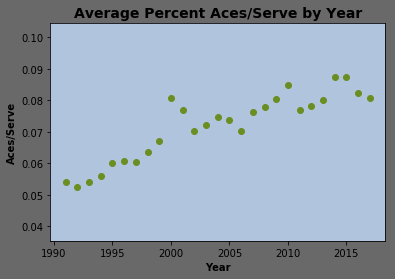

In [7]:
# Plot percent aces/year
fig, ax = plt.subplots(1, 1)
ax.set_title('Average Percent Aces/Serve by Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Aces/Serve', fontweight='bold')

ax.scatter(gs_year.index, gs_year['ave_per_ace'], color='olivedrab')
ax.set_facecolor('lightsteelblue')
fig.set_facecolor('dimgrey')

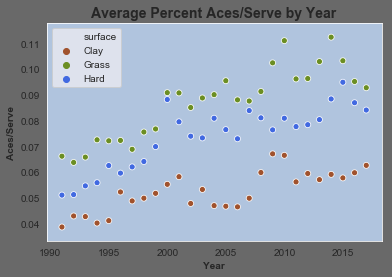

In [42]:
# Average aces per serve by year by court type
fig, ax = plt.subplots(1, 1)
sns.set_style('dark')
ax = sns.scatterplot(x="year", y="ave_per_ace", data=gs_surface_year, hue='surface', palette = ['sienna', 'olivedrab', 'royalblue'])
ax.grid(False)
ax.set_title('Average Percent Aces/Serve by Year')
ax.set_facecolor('lightsteelblue')
ax.set_title('Average Percent Aces/Serve by Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Aces/Serve', fontweight='bold')
fig.set_facecolor('dimgrey')

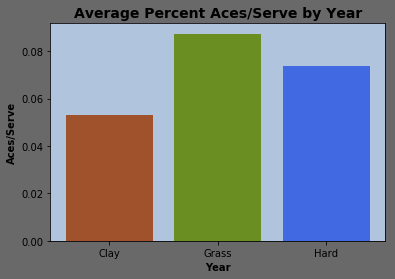

In [9]:
# Average percent aces by court type
fig, ax = plt.subplots(1, 1)
ax.set_title('Average Percent Aces/Serve by Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Aces/Serve', fontweight='bold')

ax.bar(gs_surface.index, gs_surface['ave_per_ace'], color=['sienna', 'olivedrab', 'royalblue'])
ax.set_facecolor('lightsteelblue')
ax.set_facecolor('lightsteelblue')
fig.set_facecolor('dimgrey')

# Player Statistic Analysis

In [10]:
df = matches.reset_index()
wss = ['w_ace', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_svpt', 'w_df', 'w_bpFaced', 'w_bpSaved'] 
lss = ['l_ace', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_svpt', 'l_df', 'l_bpFaced', 'l_bpSaved']

m_count = df.groupby('winner_name')['ID'].count().sort_values(ascending=False)
players = m_count[m_count > 200].index.values
players_df = pd.DataFrame(m_count[m_count > 200]).reset_index()
players_df['player'] = players_df['winner_name']

loses = df[df['loser_name'].isin(players)]
l_m_count = pd.DataFrame(df.groupby('loser_name')['loser_hand'].count().sort_values(ascending=False)).reset_index()
l_m_count['player'] = l_m_count['loser_name']

dfw = matches[(matches['winner_name'].isin(players))]
dfw = dfw.groupby('winner_name')[wss].sum()

dfw = dfw[~dfw['w_ace'].isnull()]
htw = matches[(matches['winner_name'].isin(players))]
htw = htw.groupby('winner_name')['winner_ht', 'winner_age'].mean()
htw['player'] = htw.index

dfw['player'] = dfw.index
dfl = matches[(matches['loser_name'].isin(players))]
dfl = dfl.groupby('loser_name')[lss].sum()
dfl = dfl[~dfl['l_ace'].isnull()]
dfl['player'] = dfl.index
df_temp = pd.merge(dfw, dfl, on='player')
df_temp = pd.merge(df_temp, players_df, on='player')
df_temp = pd.merge(df_temp, l_m_count, on='player')
df = pd.merge(df_temp, htw, on='player')
df = df.set_index('player')
df.head(100)

df['ace'] = (df['w_ace'] + df['l_ace'])
df['1stIn'] = (df['w_1stIn'] + df['l_1stIn'])
df['1stWon'] = (df['w_1stWon'] + df['l_1stWon'])
df['svpt'] = (df['w_svpt'] + df['l_svpt'])
df['bpFaced'] = (df['w_bpFaced'] + df['l_bpFaced'])
df['bpSaved'] = (df['w_bpSaved'] + df['l_bpSaved'])
df['2ndWon'] = (df['w_2ndWon'] + df['l_2ndWon'])
df['2ndIn'] = ((df['w_svpt'] - df['w_1stIn'] - df['w_df']) + (df['l_svpt'] - df['l_1stIn'] - df['l_df']))
df['2ndSvs'] = ((df['w_svpt'] - df['w_1stIn']) + (df['l_svpt'] - df['l_1stIn']))
df['df'] = df['w_df'] + df['l_df']
df['ace_per'] = df['ace']/df['svpt']
df['1stIn_per'] = df['1stIn']/df['svpt'] 
df['1stWon_per'] = df['1stWon']/df['1stIn'] 
df['2ndWon_per'] = df['2ndWon']/df['2ndIn']
df['df_per'] = df['df']/df['svpt']
df['bpSaved_per'] = df['bpSaved']/df['bpFaced'] 
df['serve'] = df['ace_per'] * df['1stIn_per']
df['serve_ht'] = df['serve']/df['winner_ht']
df['wins'] = df['ID']
df['loses'] = df['loser_hand']
df['wp'] = df['wins']/(df['wins']+df['loses'])
df = df[['ace_per', '1stIn_per', '1stWon_per', '2ndWon_per', 'df_per', 'bpSaved_per', 'serve', 'winner_ht', 'serve_ht', 'wins', 'loses', 'wp']]



In [11]:
# Change the field to change the ranking
field = '1stIn_per'
x = df.sort_values(field, ascending=False).head(100)
pd.DataFrame(x[field]).reset_index()

,player,1stIn_per
0,Alberto Berasategui,0.737173
1,Jordi Arrese,0.722445
2,Vijay Amritraj,0.708333
3,Guillermo Vilas,0.703125
4,Jimmy Arias,0.690605
5,Victor Hanescu,0.690238
6,Ramesh Krishnan,0.689849
7,John Isner,0.688232
8,Rafael Nadal,0.687567
9,Tim Wilkison,0.683333


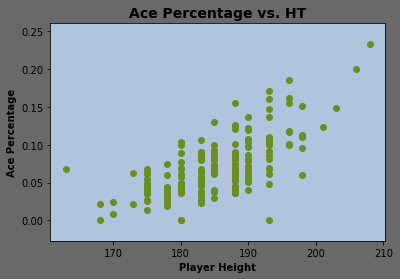

In [12]:
# Plot player ace percentage vs height
fig, ax = plt.subplots(1)
ax.scatter(df['winner_ht'], df['ace_per'], color='olivedrab')
ax.set_title('Ace Percentage vs. HT', fontsize=14, fontweight='bold')
ax.set_xlabel('Player Height', fontweight='bold')
ax.set_ylabel('Ace Percentage', fontweight='bold')
ax.set_facecolor('lightsteelblue')
fig.set_facecolor('dimgrey')

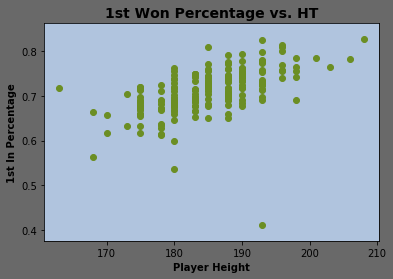

In [13]:
# Plot player 1st serves won percentage vs height
fig, ax = plt.subplots(1)
ax.scatter(df['winner_ht'], df['1stWon_per'], color='olivedrab')
ax.set_title('1st Won Percentage vs. HT', fontsize=14, fontweight='bold')
ax.set_xlabel('Player Height', fontweight='bold')
ax.set_ylabel('1st In Percentage', fontweight='bold')
ax.set_facecolor('lightsteelblue')
fig.set_facecolor('dimgrey')

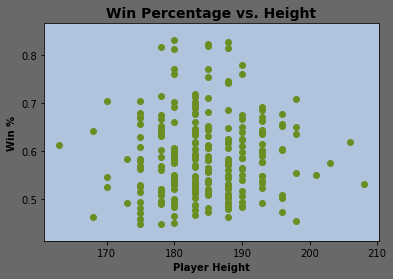

In [14]:
# Plot player win percentage vs height
fig, ax = plt.subplots(1)
ax.scatter(df['winner_ht'], df['wp'], color='olivedrab')
ax.set_title('Win Percentage vs. Height', fontsize=14, fontweight='bold')
ax.set_xlabel('Player Height', fontweight='bold')
ax.set_ylabel('Win %', fontweight='bold')
ax.set_facecolor('lightsteelblue')
fig.set_facecolor('dimgrey')

# Time Played Analysis

In [15]:
# Initialize and remove records with byes
dff = matches[matches['draw_size'].isin([64, 128])]
sel_draw = matches[matches['draw_size'].isin([64, 128])]
mt_ct = sel_draw.groupby(['tourney_id'])[['surface', 'tourney_name']].count()
mtcx = sel_draw.groupby(['tourney_id'])[['draw_size', 'tourney_name']].mean()
temp = pd.merge(mt_ct, mtcx, on='tourney_id').reset_index()
temp['bye'] = (temp['draw_size'] - temp['surface'] != 1)
byes = temp[['tourney_id']][temp['bye'] == True]
bad_tourney = dff['tourney_id'][pd.isnull(dff['minutes'])].unique()

x = sel_draw[~sel_draw['tourney_id'].isin(bad_tourney)]
y = x[~x['tourney_id'].isin(byes['tourney_id'])]

In [16]:
# Compute the time played prior to given match
sel_draw = matches[matches['draw_size'].isin([64, 128])]
mt_ct = sel_draw.groupby(['tourney_id'])[['surface', 'tourney_name']].count()
mtcx = sel_draw.groupby(['tourney_id'])[['draw_size', 'tourney_name']].mean()
temp = pd.merge(mt_ct, mtcx, on='tourney_id').reset_index()
temp['bye'] = (temp['draw_size'] - temp['surface'] != 1)
byes = temp[['tourney_id']][temp['bye'] == True]
bad_tourney = dff['tourney_id'][pd.isnull(dff['minutes'])].unique()

x = sel_draw[~sel_draw['tourney_id'].isin(bad_tourney)]
y = x[~x['tourney_id'].isin(byes['tourney_id'])]

df = y
count = 0
t_ids = df['tourney_id'].unique()
rds = [] 
for t in t_ids:
    rds = df['round'][df['tourney_id'] == t].unique()
    #players = gs_raw['winner_name'][(gs_raw['tourney_id']==t) & (gs_raw['round']==rds[0])].values
    for rd in range(len(rds)-1):
        #gs[((gs['winner_name']==p) | (gs['loser_name']==p)) &]
        temp_prev = df[(df['tourney_id'] == t) & (df['round'] == rds[rd])]
        temp_cur = df[(df['tourney_id'] == t) & (df['round'] == rds[rd + 1])]
        for index, row in temp_cur.iterrows():
            w = row['winner_name']
            tp = temp_prev.loc[temp_prev['winner_name'] == w]['w_tp'].values
            mins = temp_prev.loc[temp_prev['winner_name'] == w]['minutes'].values
            df.loc[index, 'w_tp'] += tp + mins
            df.loc[index, 'w_prev'] += mins
            l = row['loser_name']
            tp = temp_prev.loc[temp_prev['winner_name'] == l]['l_tp'].values
            mins = temp_prev.loc[temp_prev['winner_name'] == l]['minutes'].values
            df.loc[index, 'l_tp'] += tp + mins
            df.loc[index, 'l_prev'] += mins

/Users/chochimagic/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/Users/chochimagic/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chochimagic/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chochimagic/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

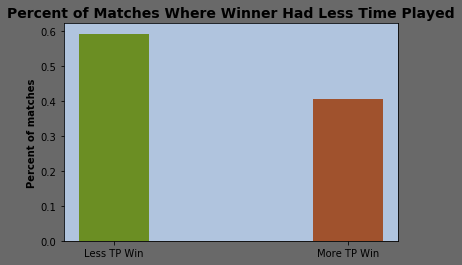

In [17]:
# Remove first round matchups and compute and graph the statistics 
y['tp_diff'] = y['w_tp'] - y['l_tp']
y['prev_diff'] = y['w_prev'] - y['l_prev']
y['less_win'] = (y['tp_diff'] < 0)
y['prev_win'] = (y['prev_diff'] < 0)
df = y[(y['w_tp']!=0)&(y['l_tp']!=0)]
grp_df = df.groupby('less_win')['tourney_id'].count()
percents = [grp_df[1]/(grp_df[0]+grp_df[1]), grp_df[0]/(grp_df[0]+grp_df[1])]

fig, ax = plt.subplots(1)
ax.bar(['Less TP Win', 'More TP Win'], percents, width=0.3, color=['olivedrab', 'sienna'])
ax.set_title('Percent of Matches Where Winner Had Less Time Played', fontsize=14, fontweight='bold')
ax.set_ylabel('Percent of matches', fontweight='bold')
ax.set_facecolor('lightsteelblue')
fig.set_facecolor('dimgrey')
